In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import streamlit as st

# 1. Data Exploration

In [4]:
df_train= pd.read_csv('Titanic_train.csv')
df_test= pd.read_csv('Titanic_test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
sns.set(style='whitegrid')

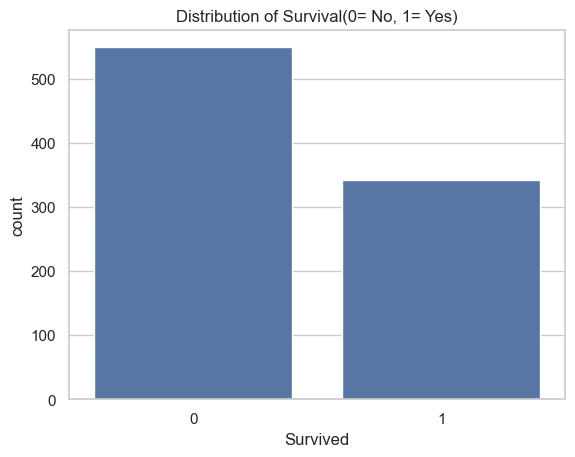

In [32]:
# Visualize the distribution of survivors
sns.countplot(x='Survived',data=df_train)
plt.title('Distribution of Survival(0= No, 1= Yes)')
plt.show()

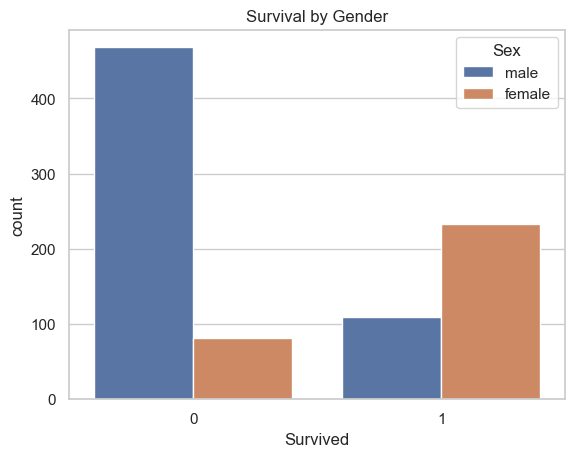

In [34]:
# Visualize the distribution of survivors by gender
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival by Gender')
plt.show()

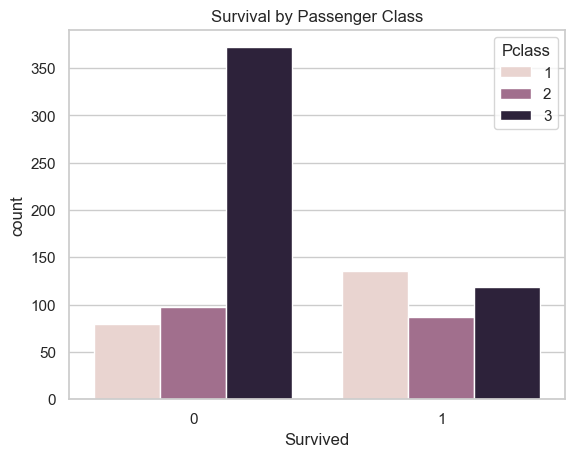

In [36]:
# Visualize the distribution of survivors by class
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Survival by Passenger Class')
plt.show()

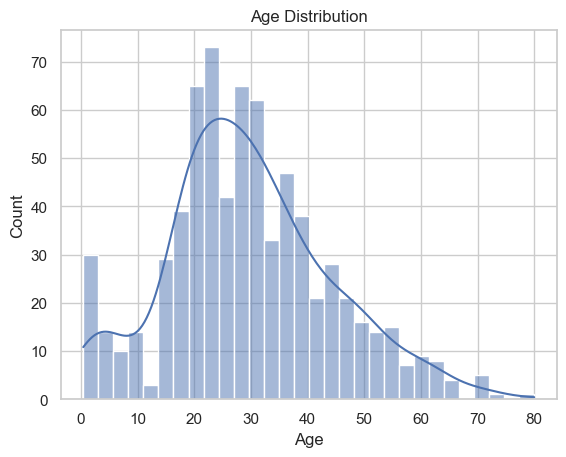

In [38]:
# Visualize the age distribution
sns.histplot(df_train['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

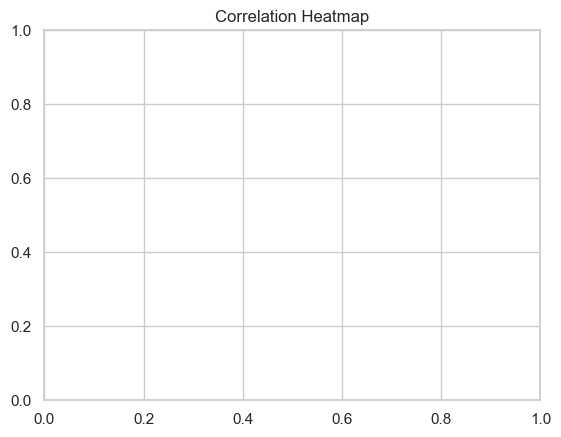

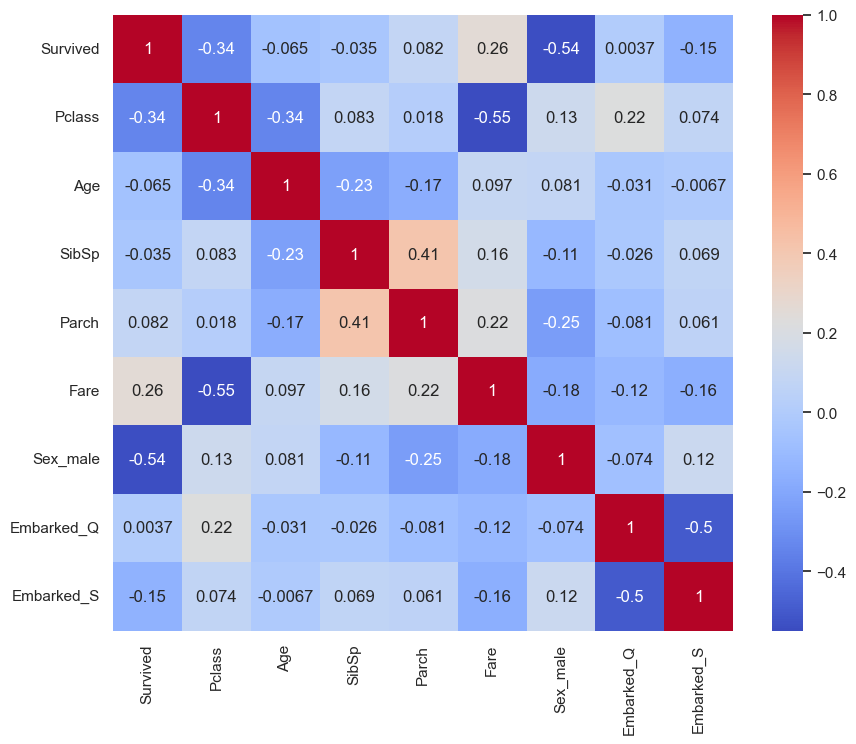

In [130]:
# Check correlation between numerical features and target
plt.title('Correlation Heatmap')
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Data Preprocessing

In [47]:
# Handling missing values in 'Age' by filling with median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7184\1349607217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7184\1349607217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [49]:
# Fill missing 'Embarked' values with the most common value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7184\2485168375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [51]:
# Drop 'Cabin' as it contains too many missing values
df_train.drop(columns='Cabin', inplace=True)
df_test.drop(columns='Cabin', inplace=True)

# Drop unnecessary columns for modeling
df_train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [53]:
# Convert categorical variables into dummy/indicator variables
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

In [55]:
# Ensure both train and test sets have the same dummy variables
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

df_test = df_test[df_train.columns.drop('Survived')]

# 3. Model Building:

In [58]:
features = df_train.drop(columns='Survived')
target = df_train['Survived']

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
df_test = scaler.transform(df_test)

In [64]:
model = LogisticRegression()
model.fit(X, target)

LogisticRegression()

In [66]:
y_pred = model.predict(X)

In [70]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

# 4. Model Evaluation:

In [75]:
accuracy = accuracy_score(target, y_pred)
conf_matrix = confusion_matrix(target, y_pred)
class_report = classification_report(target, y_pred)

In [113]:
print("Accuracy score",accuracy)
print("Classification report",class_report)

Accuracy score 0.7991021324354658
Classification report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



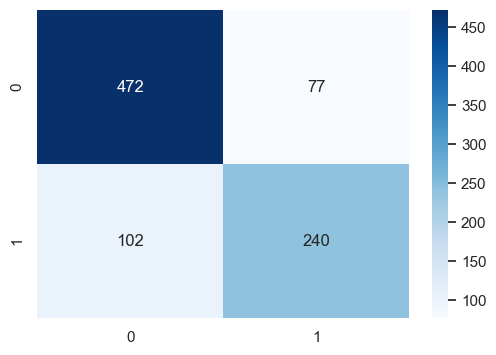

In [111]:
# Confusion Matrix Heatmap
st.subheader('Confusion Matrix Heatmap')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
st.pyplot(plt)
plt.show()

<Figure size 800x600 with 0 Axes>

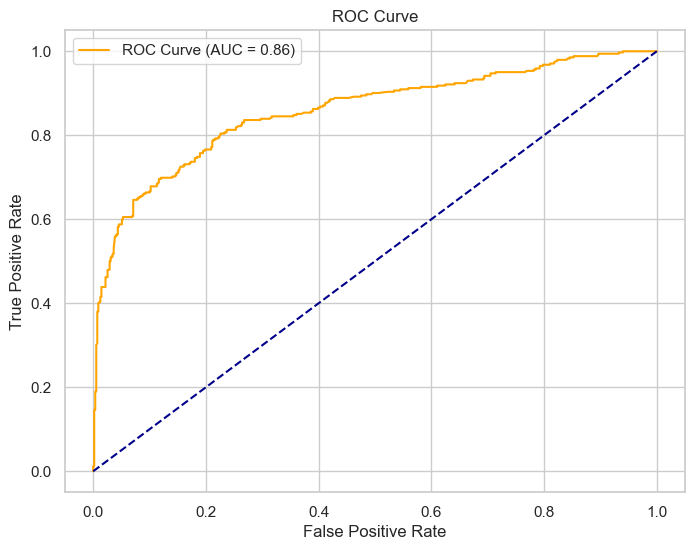

In [89]:
# 10. ROC Curve and AUC
y_prob = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(target, y_prob)
roc_auc = roc_auc_score(target, y_prob)

st.subheader(f'Receiver Operating Characteristic (ROC) Curve - AUC: {roc_auc:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
st.pyplot(plt)
plt.show()

# Displaying interpretations in Streamlit

In [116]:
st.title('Interpretation of Results')
st.write('### Accuracy')
st.write('The accuracy of the model indicates how often the model predicts correctly. In this case, we can see how well the model performed based on the provided data.')

st.write('### Confusion Matrix')
st.write('The confusion matrix helps in understanding the number of true positives, true negatives, false positives, and false negatives.')

st.write('### ROC Curve')
st.write('The ROC Curve and the AUC (Area Under the Curve) score provide insight into the performance of the model at various threshold settings. An AUC close to 1 indicates a good model.')

st.title('Deploying the Model with Streamlit')
st.write('This model is deployed using Streamlit, an open-source app framework. The Streamlit app allows you to visualize data, train models, and interpret results interactively.')
